In [1]:
from helper import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
helper = Helper()
X_train, X_test, y_train, y_test = helper.getTrainTestNums()

F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note 

In [3]:
accuracy = []
val_accuracy = []
val_loss = []
loss = []

In [4]:
model = load_model("saved_models/genre_classification_scaled.hdf5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14848     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               6

In [10]:
model = Sequential()


# first layer
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer 
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14848     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               6

In [11]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [17]:
epochs = 50
batch_size = 128
checkpointer = ModelCheckpoint(filepath='saved_models/genre_classification_scaled.hdf5',
                              verbose = 1, saved_best_only=True)
start = datetime.now()

history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),callbacks=[checkpointer],verbose=1)

print("Training compiled in time: ",(datetime.now() - start))

Epoch 1/50
1/7 [===>..........................] - ETA: 0s - loss: 0.5404 - accuracy: 0.7969
Epoch 00001: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 0s 29ms/step - loss: 0.5497 - accuracy: 0.8012 - val_loss: 0.8932 - val_accuracy: 0.6850
Epoch 2/50
1/7 [===>..........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.7891
Epoch 00002: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 0.4943 - accuracy: 0.8200 - val_loss: 0.8681 - val_accuracy: 0.7000
Epoch 3/50
1/7 [===>..........................] - ETA: 0s - loss: 0.4857 - accuracy: 0.8359
Epoch 00003: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 0s 13ms/step - loss: 0.5296 - accuracy: 0.8225 - val_loss: 0.8786 - val_accuracy: 0.7100
Epoch 4/50
1/7 [===>..........................] - ETA: 0s - loss: 0.5882 - accuracy: 0.7812
Epoch 00004: saving mod

Epoch 28/50
1/7 [===>..........................] - ETA: 0s - loss: 0.3719 - accuracy: 0.8672
Epoch 00028: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 0s 40ms/step - loss: 0.3994 - accuracy: 0.8662 - val_loss: 0.9803 - val_accuracy: 0.7050
Epoch 29/50
5/7 [====================>.........] - ETA: 0s - loss: 0.4191 - accuracy: 0.89 - ETA: 0s - loss: 0.3821 - accuracy: 0.8797
Epoch 00029: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 0s 29ms/step - loss: 0.3881 - accuracy: 0.8737 - val_loss: 0.9888 - val_accuracy: 0.7200
Epoch 30/50
1/7 [===>..........................] - ETA: 0s - loss: 0.4089 - accuracy: 0.8750
Epoch 00030: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 0s 22ms/step - loss: 0.3715 - accuracy: 0.8763 - val_loss: 0.9557 - val_accuracy: 0.7050
Epoch 31/50
1/7 [===>..........................] - ETA: 0s - loss: 0.2

In [18]:
accuracy.extend(history.history['accuracy'])
val_accuracy.extend(history.history['val_accuracy'])
loss.extend(history.history['loss'])
val_loss.extend(history.history['val_loss'])

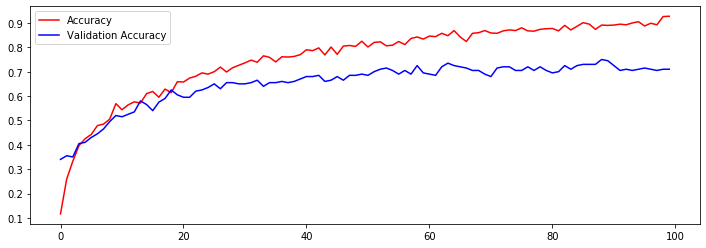

In [20]:
# Accuracy
plt.figure(figsize=(12,4))
plt.plot(accuracy,color='red')
plt.plot(val_accuracy,color='blue')
plt.legend(['Accuracy','Validation Accuracy'])

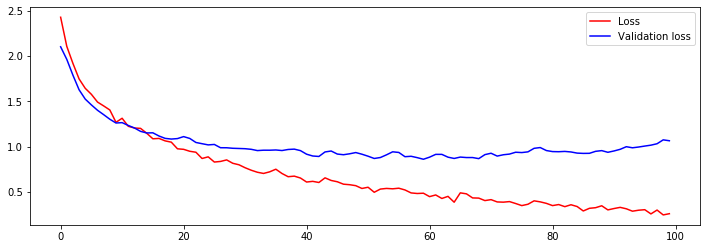

In [24]:
# Loss
plt.figure(figsize=(12,4))
plt.plot(loss,color='red')
plt.plot(val_loss,color='blue')
plt.legend(['Loss','Validation loss'],loc ="upper right")

In [5]:
y_pred = model.predict(X_test)
y_pred = np.array([[round(j) for j in i] for i in y_pred],dtype='float64')

Accuracy:  0.685
F-Score:  0.7193206419449962


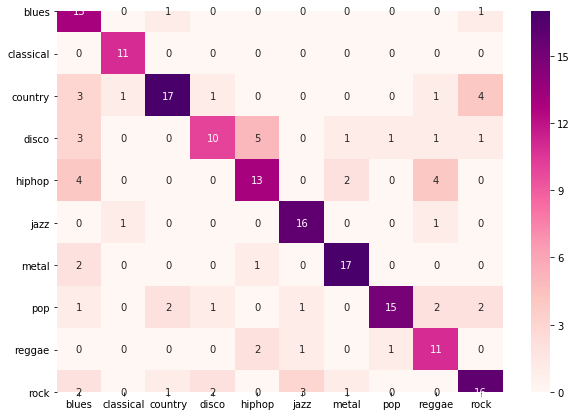

In [6]:
helper.evaluate(y_pred)